In [ ]:
# Import Library and Dataset

In [20]:
import pandas as pd
import numpy as np
import datetime as dt
#Importing library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")
#Importing library for splitting model into train and test and for data transformation
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,roc_auc_score,classification_report

In [21]:
data = pd.read_excel("/FlightPrice/Flight_Price_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Mounted at /content/drive


# Feature Engineering

In [22]:
# data Recodrs
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [24]:
# Shape of data

print("Number of rows in Dataset :",data.shape[0])
print("Number of columns in Dataset :",data.shape[1])

Number of rows in Dataset : 10683
Number of columns in Dataset : 11


In [25]:
#statistical info
print("Statistical information for Flight Price :\n")
data.describe()

Statistical information for Flight Price :



,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [26]:
print("Statistical information of Categorical Data for Flight Price :\n")
data.select_dtypes(object).describe()

Statistical information of Categorical Data for Flight Price :



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [27]:
# Infomation about columns and datatype of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [28]:
# Find Null Values
print("Number of Null Values in Dataset:")
data.isnull().sum()

Number of Null Values in Dataset:


,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [29]:
# Dropping null values
data=data.dropna()
print("After Dropping checking for Null Values :")
data.isnull().sum()

After Dropping checking for Null Values :


,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [30]:
# Duplicate Values
print("Number of Duplicates values :",data.duplicated().sum())

Number of Duplicates values : 220


In [31]:
# Drop null Values
data=data.drop_duplicates()
print("Number of Duplicates values after Dropping:",data.duplicated().sum())

Number of Duplicates values after Dropping: 0


In [32]:
print("Shape of Data after dropping.......")
print("Number of rows in Dataset :",data.shape[0])
print("Number of columns in Dataset :",data.shape[1])

Shape of Data after dropping.......
Number of rows in Dataset : 10462
Number of columns in Dataset : 11


In [33]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


<Axes: >

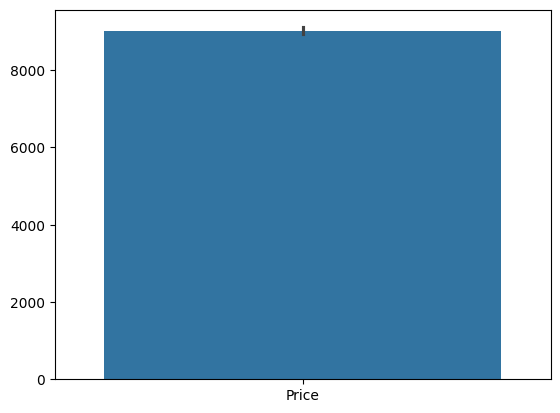

In [34]:
# Checking for ouliers
sns.barplot(data)

# Extract Date,Month,Year from Date_of_journey

In [35]:
# finds the Data type of date column
data['Date_of_Journey'].dtypes

dtype('O')

In [ ]:
# Convert Data type to date and time
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])

In [ ]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [37]:
# Convert 'Date_of_Journey' to datetime if it's not already
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')

# Extract Date,Month,Year from Date_of_journey
data['Date']=data['Date_of_Journey'].dt.day
data['Month']=data['Date_of_Journey'].dt.month
data['Year']=data['Date_of_Journey'].dt.year

In [38]:
# After Extracting Date, Month, year
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [39]:
# Data Preprocessing /EDA

In [40]:
# Most Preffered Airline
data.Airline.value_counts()

,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1694
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


<Axes: ylabel='count'>

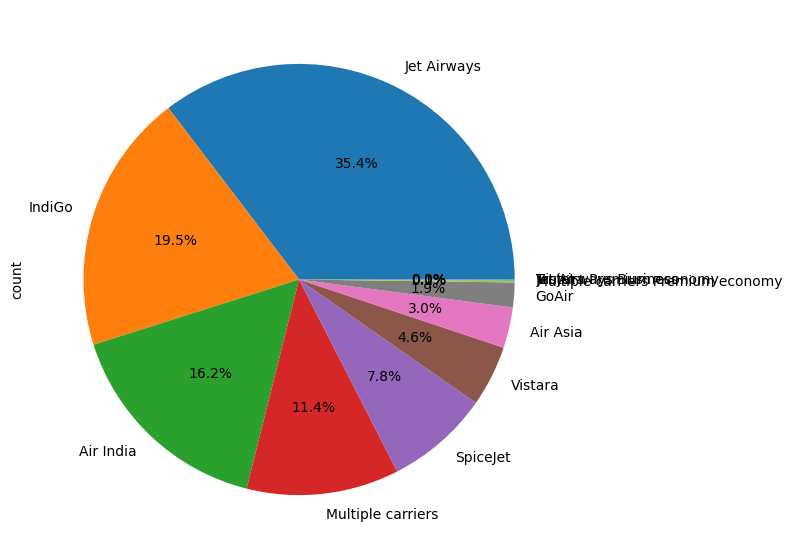

In [41]:
plt.figure(figsize=(7,7))
data.Airline.value_counts().plot.pie(autopct="%.1f%%")

# Jet Airways is the most preferred Airline which is 35.4 %

In [43]:
#  majority of the flights take off from source

In [44]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [45]:
data.Source.value_counts()

,count
Source,
Delhi,4345
Kolkata,2860
Banglore,2179
Mumbai,697
Chennai,381


<Axes: ylabel='count'>

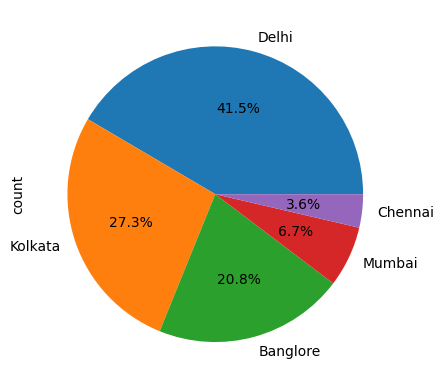

In [46]:
data.Source.value_counts().plot.pie(autopct="%.1f%%")

# Majority of the flights take off from source is DELHI which is 41.5%

In [47]:
#  maximum flights land in which destination
data.Destination.value_counts()

,count
Destination,
Cochin,4345
Banglore,2860
Delhi,1265
New Delhi,914
Hyderabad,697
Kolkata,381


<Axes: ylabel='count'>

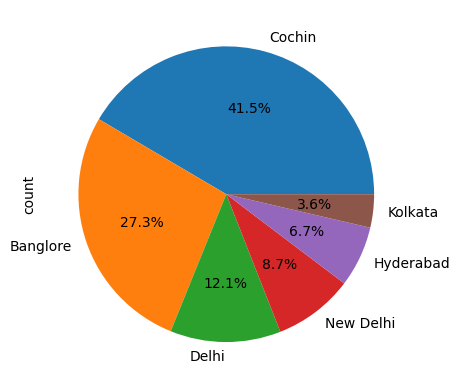

In [48]:
data.Destination.value_counts().plot.pie(autopct="%.1f%%")

# Maximum flights land in COCHIN destination which is 41.5%

In [49]:
# airline has the highest price

<Axes: xlabel='Price', ylabel='Airline'>

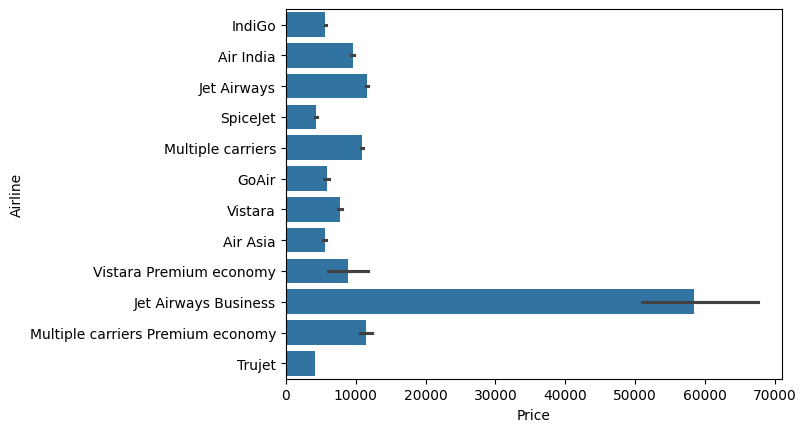

In [50]:
sns.barplot(x=data['Price'],y=data['Airline'])

# Jet Airways business has Hightest price among all Airlines

In [51]:
#business class flights are high price or low and find only those flights which price is higher than 50k

In [52]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [53]:
data.Additional_Info.value_counts()

,count
Additional_Info,
No info,8182
In-flight meal not included,1926
No check-in baggage included,318
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [54]:
# There only one bussines class Flight which is jet Airwas business

# Business class flights with Low price

In [55]:
data[((data['Airline']=='Jet Airways Business') | (data['Additional_Info']=='Business class')) & (data['Price'] < 50000)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
3032,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,28097,1,3,2019
7351,Jet Airways Business,2019-03-03,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490,3,3,2019


# Business class flights with high price which is higher than 50k

In [56]:
data[((data['Airline']=='Jet Airways Business') | (data['Additional_Info']=='Business class')) & (data['Price'] > 50000)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
657,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229,1,3,2019
2924,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,1,3,2019
5372,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,1,3,2019
9715,Jet Airways Business,2019-03-06,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285,6,3,2019
10364,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,1,3,2019


In [57]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [58]:
#converting time

In [60]:
data['Duration']=pd.to_timedelta(data['Duration'])

In [61]:
data['Duration_hour']=data['Duration']/pd.Timedelta(hours=1)

In [62]:
data['Arrival_Hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_Minute']=pd.to_datetime(data['Arrival_Time']).dt.minute
data['Dep_Hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_Minute']=pd.to_datetime(data['Dep_Time']).dt.minute


In [ ]:
data.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration           timedelta64[ns]
Total_Stops                 object
Additional_Info             object
Price                        int64
Date                         int32
Month                        int32
Year                         int32
Duration_hour              float64
Arrival_Hour                 int32
Arrival_Minute               int32
Dep_Hour                     int32
Dep_Minute                   int32
dtype: object

In [63]:
data=data.drop(['Arrival_Time','Dep_Time','Duration'],axis=1)
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Duration_hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,2.833333,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,7.416667,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,19.000000,4,25,9,25


# Perform Encoding

In [64]:
Numeric=data.select_dtypes(include=[np.number])
Numeric.head(3)

,Price,Date,Month,Year,Duration_hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,3897,24,3,2019,2.833333,1,10,22,20
1,7662,1,5,2019,7.416667,13,15,5,50
2,13882,9,6,2019,19.000000,4,25,9,25


In [65]:
Qualitative=data.select_dtypes(include=[object])
Qualitative.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info


# Apply Label Encoder

In [66]:
from sklearn.preprocessing import LabelEncoder
Qualitative=Qualitative.apply(LabelEncoder().fit_transform)
Qualitative.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,18,4,8
1,1,3,0,84,1,8
2,4,2,1,118,1,8


In [67]:
# Merge Numeric and Qualitative data
final_data=pd.concat((Qualitative,Numeric),axis=1)
final_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Duration_hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,3,0,5,18,4,8,3897,24,3,2019,2.833333,1,10,22,20
1,1,3,0,84,1,8,7662,1,5,2019,7.416667,13,15,5,50
2,4,2,1,118,1,8,13882,9,6,2019,19.000000,4,25,9,25


<Axes: xlabel='Price', ylabel='Count'>

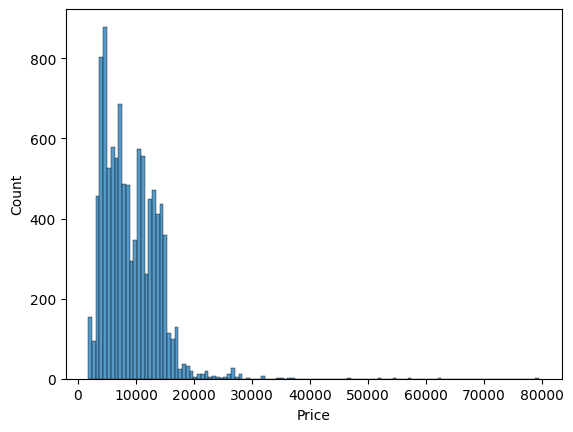

In [69]:
sns.histplot(x=final_data['Price'],data=final_data)

<Axes: xlabel='Price', ylabel='Count'>

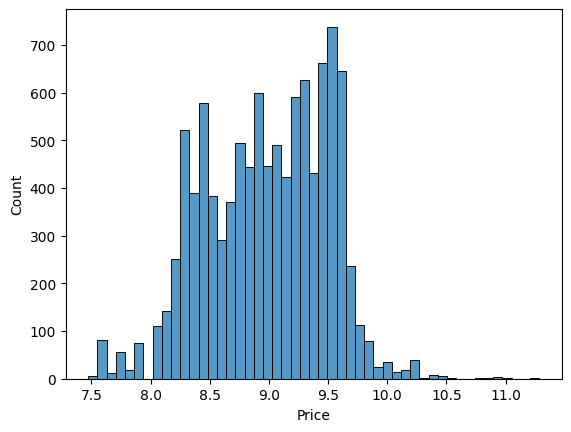

In [70]:
final_data['Price']=np.log(final_data['Price'])
sns.histplot(x=final_data['Price'],data=final_data)


# Data Partion

In [72]:
from sklearn.model_selection import train_test_split,GridSearchCV

x = final_data.drop(['Price'],axis=1)
y = final_data[['Price']]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

# Independent Dataset

In [73]:
print("Number of rows in  Train Dataset :",X_train.shape[0])
print("Number of columns in Train Dataset :",X_train.shape[1])

Number of rows in  Train Dataset : 7323
Number of columns in Train Dataset : 14


In [74]:
print("Number of rows in  Test Dataset :",X_test.shape[0])
print("Number of columns in Test Dataset :",X_test.shape[1])

Number of rows in  Test Dataset : 3139
Number of columns in Test Dataset : 14


# Dependent Dataset

In [75]:
print("Number of rows in  Train Dataset :",y_train.shape[0])
print("Number of columns in Train Dataset :",y_train.shape[1])

Number of rows in  Train Dataset : 7323
Number of columns in Train Dataset : 1


In [76]:
print("Number of rows in  Test Dataset :",y_test.shape[0])
print("Number of columns in Test Dataset :",y_test.shape[1])

Number of rows in  Test Dataset : 3139
Number of columns in Test Dataset : 1


In [ ]:
# Merge xn y into train and test

In [77]:
train = pd.concat([X_train, y_train], axis=1)
train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Year,Duration_hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Price
7420,3,2,1,104,0,8,27,5,2019,13.500000,21,0,7,30,8.783549
883,4,2,1,104,0,5,27,5,2019,10.166667,4,25,18,15,9.464828


In [78]:
test = pd.concat([X_test, y_test], axis=1)
test.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Year,Duration_hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Price
10339,4,3,0,73,0,5,12,6,2019,13.333333,9,45,20,25,9.262838
6897,6,2,1,104,0,8,6,3,2019,14.833333,18,50,4,0,9.502935


# Machine Learning Model

In [79]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Year,Duration_hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Price
Airline,1.000000,-0.009784,0.019816,0.026552,0.031168,-0.060477,0.026103,0.023997,nan,-0.150343,0.003256,-0.076957,-0.029839,-0.056783,-0.057419
Source,-0.009784,1.000000,-0.588532,0.398012,-0.217054,-0.007336,-0.001955,0.180436,nan,0.165795,0.011225,0.025205,0.059755,-0.052614,0.008787
Destination,0.019816,-0.588532,1.000000,-0.457286,0.334843,0.024196,-0.045443,-0.354185,nan,-0.262585,-0.041526,0.019594,-0.079580,0.128010,-0.166407
Route,0.026552,0.398012,-0.457286,1.000000,-0.434675,0.046240,0.068528,0.240615,nan,0.271982,0.020723,-0.175681,-0.079894,-0.070024,0.228466
Total_Stops,0.031168,-0.217054,0.334843,-0.434675,1.000000,0.163574,0.040092,-0.020091,nan,-0.613476,-0.097413,0.180107,0.043055,0.048245,-0.679483
Additional_Info,-0.060477,-0.007336,0.024196,0.046240,0.163574,1.000000,-0.021810,-0.049481,nan,-0.166394,0.020151,0.047482,-0.061089,-0.007305,-0.093261
Date,0.026103,-0.001955,-0.045443,0.068528,0.040092,-0.021810,1.000000,-0.026822,nan,-0.031481,-0.003019,-0.009135,0.001351,-0.012885,-0.134742
Month,0.023997,0.180436,-0.354185,0.240615,-0.020091,-0.049481,-0.026822,1.000000,nan,0.002135,-0.000487,-0.094824,0.048010,-0.067240,-0.077367
Year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Duration_hour,-0.150343,0.165795,-0.262585,0.271982,-0.613476,-0.166394,-0.031481,0.002135,nan,1.000000,0.059056,-0.071638,0.003702,-0.022729,0.590133


In [80]:
result = pd.DataFrame(columns=['Model','Train Accuracy(R2)','Test Accuracy(R2)','Train_RMSE','Test_RMSE'])
result

,Model,Train Accuracy(R2),Test Accuracy(R2),Train_RMSE,Test_RMSE


# Applying StandardScaler

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Linear Regression Model

In [82]:
data1=final_data

In [83]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

In [84]:
import numpy as np
train['Predicted'] = np.round(Model.predict(X_train),2)
train['Residual'] = np.round(train.Price - train.Predicted,2)
train['Original_price']=np.exp(train.Price)
train.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Year,Duration_hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Price,Predicted,Residual,Original_price
7420,3,2,1,104,0,8,27,5,2019,13.500000,21,0,7,30,8.783549,9.15,-0.37,6526.0
883,4,2,1,104,0,5,27,5,2019,10.166667,4,25,18,15,9.464828,9.08,0.38,12898.0
6114,4,2,1,116,1,8,18,5,2019,13.500000,19,0,5,30,9.624369,9.05,0.57,15129.0


In [85]:
from sklearn.metrics import r2_score
LRtrain_r2 = r2_score(train.Price,train.Predicted)
LRTrain_r2=np.round(LRtrain_r2,2)*100
print('R2 score for model Performance on Train : ',LRTrain_r2 )

R2 score for model Performance on Train :  55.00000000000001


In [86]:
from sklearn.metrics import mean_squared_error
model_mse = mean_squared_error(train['Price'], train['Predicted'])
LRtrain_rmse = np.sqrt(model_mse)
LRtrain_rmse= np.exp(LRtrain_rmse)
print("Train RMSE :",LRtrain_rmse)


Train RMSE : 1.4127660550274113


In [87]:
test['Predicted'] = np.round(Model.predict(X_test),2)
test['Residual'] = np.round(test.Price - test.Predicted,2)
test['Original_price']=np.exp(test.Price)
test.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Year,Duration_hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Price,Predicted,Residual,Original_price
10339,4,3,0,73,0,5,12,6,2019,13.333333,9,45,20,25,9.262838,9.14,0.12,10539.0
6897,6,2,1,104,0,8,6,3,2019,14.833333,18,50,4,0,9.502935,9.39,0.11,13399.0
7255,3,4,3,48,4,8,15,3,2019,1.500000,18,25,16,55,8.063063,8.31,-0.25,3175.0


In [88]:
from sklearn.metrics import r2_score
LRTest_r2 = r2_score(test.Price,test.Predicted)
LRTest_r2 = np.round(LRTest_r2,2)*100

print('R2 score for model Performance on Train : ', LRTest_r2)

R2 score for model Performance on Train :  56.00000000000001


In [89]:
from sklearn.metrics import mean_squared_error
model2_mse = mean_squared_error(test['Price'], test['Predicted'])
LRTestmodel_rmse = np.sqrt(model2_mse)**2
LRTest_rmse = np.sqrt(model_mse)
LRTest_rmse= np.exp(LRtrain_rmse)
print("Test RMSE : ",LRTest_rmse)

Test RMSE :  4.107300725767073


In [90]:

result = result._append(pd.Series({'Model':'Linear Regression','Train Accuracy(R2)':LRTrain_r2,'Train_RMSE':LRtrain_rmse,'Test Accuracy(R2)': LRTest_r2,'Test_RMSE':LRTest_rmse}),ignore_index=True )
result

,Model,Train Accuracy(R2),Test Accuracy(R2),Train_RMSE,Test_RMSE
0,Linear Regression,55.0,56.0,1.412766,4.107301


# Decision Tree model

In [91]:
from sklearn import tree
Model2 = tree.DecisionTreeRegressor(criterion='squared_error',max_depth=4)
Model2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [92]:
d_predTrain=np.round(Model2.predict(X_train),2)
d_predTest=np.round(Model2.predict(X_test),2)

In [93]:
dtTrain_r2 = r2_score(train.Price,d_predTrain)
dtTrain_r2=np.round(dtTrain_r2,2)*100
print('R2 score for model Performance on Train : ', dtTrain_r2)
model3_mse = mean_squared_error(train['Price'], d_predTrain)
dtTrain_rmse = np.sqrt(model3_mse)
dtTrain_rmse= np.exp(dtTrain_rmse)
print("Train RMSE : ",(dtTrain_rmse))

R2 score for model Performance on Train :  75.0
Train RMSE :  1.2962719476942892


In [94]:
dtTest_r2 = r2_score(test.Price,d_predTest)
dtTest_r2=np.round(dtTest_r2,2)*100
print('R2 score for model Performance on Train : ', dtTest_r2)
model4_mse = mean_squared_error(test['Price'], d_predTest)
dtTest_rmse = np.sqrt(model4_mse)
dtTest_rmse= np.exp(dtTest_rmse)
print("Text RMSE : ",(dtTest_rmse))

R2 score for model Performance on Train :  74.0
Text RMSE :  1.2981018362360806


In [95]:
result = result._append(pd.Series({'Model':'DecisionTree Regression','Train Accuracy(R2)':dtTrain_r2,'Train_RMSE':dtTrain_rmse,'Test Accuracy(R2)': dtTest_r2,'Test_RMSE':dtTest_rmse}),ignore_index=True )
result

,Model,Train Accuracy(R2),Test Accuracy(R2),Train_RMSE,Test_RMSE
0,Linear Regression,55.0,56.0,1.412766,4.107301
1,DecisionTree Regression,75.0,74.0,1.296272,1.298102


# Random Forest Model


In [96]:
from sklearn.ensemble import RandomForestRegressor
Model3 = RandomForestRegressor(n_estimators=50, criterion='squared_error',max_depth= 4)
Model3.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=50)

In [97]:
R_predTrain=np.round(Model3.predict(X_train),2)
R_predTest=np.round(Model3.predict(X_test),2)

In [98]:
RDTrain_r2= r2_score(train.Price,R_predTrain)
RDTrain_r2=np.round(RDTrain_r2,2)*100
print('R2 score for model Performance on Train : ', RDTrain_r2)
model5_mse = mean_squared_error(train['Price'], R_predTrain)
RDTrain_rmse = np.sqrt(model5_mse)
RDTrain_rmse= np.exp(RDTrain_rmse)
print("Train RMSE : ",(RDTrain_rmse))

R2 score for model Performance on Train :  76.0
Train RMSE :  1.2873595488175817


In [99]:
RDTest_r2 = r2_score(test.Price,R_predTest)
RDTest_r2=np.round(RDTest_r2,2)*100
print('R2 score for model Performance on Train : ', RDTest_r2)
model6_mse = mean_squared_error(test['Price'], R_predTest)
RDTest_rmse = np.sqrt(model6_mse)
RDTest_rmse= np.exp(RDTest_rmse)
print("Test RMSE : ",(RDTest_rmse))

R2 score for model Performance on Train :  76.0
Test RMSE :  1.2868599470519706


In [100]:
result = result._append(pd.Series({'Model':'RandomForest Regression','Train Accuracy(R2)':RDTrain_r2,'Train_RMSE':RDTrain_rmse,'Test Accuracy(R2)': RDTest_r2,'Test_RMSE':RDTest_rmse}),ignore_index=True )
result

,Model,Train Accuracy(R2),Test Accuracy(R2),Train_RMSE,Test_RMSE
0,Linear Regression,55.0,56.0,1.412766,4.107301
1,DecisionTree Regression,75.0,74.0,1.296272,1.298102
2,RandomForest Regression,76.0,76.0,1.287360,1.286860


# Ridge Regression Model

In [101]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=1)
ridgereg.fit(X_train,y_train)

Ridge(alpha=1)

In [102]:
RegTrain=np.round(ridgereg.predict(X_train),2)
RegTest=np.round(ridgereg.predict(X_test),2)

In [103]:
RegTrain_r2= r2_score(train.Price,RegTrain)
RegTrain_r2=np.round(RegTrain_r2,2)*100
print('R2 score for model Performance on Train : ', RegTrain_r2)
model6_mse = mean_squared_error(train['Price'],RegTrain)
RegTrain_rmse = np.sqrt(model6_mse)
RegTrain_rmse=np.exp(RegTrain_rmse)
print("Train RMSE : ",RegTrain_rmse)

R2 score for model Performance on Train :  55.00000000000001
Train RMSE :  1.412749911733923


In [104]:
RegTest_r2 = r2_score(test.Price,RegTest)
RegTest_r2=np.round(RegTest_r2,2)*100
print('R2 score for model Performance on Train : ', RegTest_r2)
model7_mse = mean_squared_error(test['Price'],RegTest)
RegTest_rmse = np.sqrt(model7_mse)
RegTest_rmse =np.exp(RegTest_rmse )
print("Test RMSE :",RegTest_rmse )

R2 score for model Performance on Train :  56.00000000000001
Test RMSE : 1.40338779224303


In [105]:
result = result._append(pd.Series({'Model':'Redge Regression','Train Accuracy(R2)':RegTrain_r2,'Train_RMSE':RegTrain_rmse,'Test Accuracy(R2)': RegTest_r2,'Test_RMSE':RegTest_rmse}),ignore_index=True )
result

,Model,Train Accuracy(R2),Test Accuracy(R2),Train_RMSE,Test_RMSE
0,Linear Regression,55.0,56.0,1.412766,4.107301
1,DecisionTree Regression,75.0,74.0,1.296272,1.298102
2,RandomForest Regression,76.0,76.0,1.287360,1.286860
3,Redge Regression,55.0,56.0,1.412750,1.403388


# Lasso Regression Model

In [106]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.1)
lassoreg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [107]:
lassoregTrain=np.round(lassoreg.predict(X_train),2)
lassoregTest=np.round(lassoreg.predict(X_test),2)

In [108]:
lassoregTrain_r2= r2_score(train.Price,lassoregTrain)
lassoregTrain_r2=np.round(lassoregTrain_r2,2)*100
print('R2 score for model Performance on Train : ', lassoregTrain_r2)
model8_mse = mean_squared_error(train['Price'],lassoregTrain)
lassoregTrain_rmse = np.sqrt(model6_mse)
lassoregTrain_rmse=np.exp(lassoregTrain_rmse)
print("Train RMSE : ",lassoregTrain_rmse)

R2 score for model Performance on Train :  46.0
Train RMSE :  1.412749911733923


In [109]:
lassoregTest_r2 = r2_score(test.Price,lassoregTest)
lassoregTest_r2=np.round(lassoregTest_r2,2)*100
print('R2 score for model Performance on Train : ', lassoregTest_r2)
model9_mse = mean_squared_error(test['Price'],lassoregTest)
lassoregTest_rmse = np.sqrt(model8_mse)
lassoregTest_rmse =np.exp(lassoregTest_rmse)
print("Test RMSE : ",lassoregTest_rmse )

R2 score for model Performance on Train :  48.0
Test RMSE :  1.4591082274029785


In [110]:
result = result._append(pd.Series({'Model':'Lasso Regression','Train Accuracy(R2)':lassoregTrain_r2,'Train_RMSE':lassoregTrain_rmse,'Test Accuracy(R2)':lassoregTest_r2,'Test_RMSE':lassoregTest_rmse}),ignore_index=True )
result

,Model,Train Accuracy(R2),Test Accuracy(R2),Train_RMSE,Test_RMSE
0,Linear Regression,55.0,56.0,1.412766,4.107301
1,DecisionTree Regression,75.0,74.0,1.296272,1.298102
2,RandomForest Regression,76.0,76.0,1.287360,1.286860
3,Redge Regression,55.0,56.0,1.412750,1.403388
4,Lasso Regression,46.0,48.0,1.412750,1.459108


# Gradient Boosting Regressior

In [111]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)

GradientBoostingRegressor()

In [112]:
model_parameters = {'n_estimators': [2,4,5,6], # number of tress
                    'max_depth':    [2, 3],      # maximum branches in tree
                    'learning_rate':[0.7, 0.6,0.5],
                    'min_samples_leaf':[70,50], ## child
                    'min_samples_split':[50,70]} #parent

In [113]:
GBR=GradientBoostingRegressor(random_state=10,criterion="squared_error")

gscv_GBM = GridSearchCV(estimator=GBR,
                    param_grid=model_parameters,  # comibnation = 4
                    cv=10,  # K-fold = 10 or 5
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingRegressor(criterion='squared_error',
                                                 random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.7, 0.6, 0.5], 'max_depth': [2, 3],
                         'min_samples_leaf': [70, 50],
                         'min_samples_split': [50, 70],
                         'n_estimators': [2, 4, 5, 6]},
             scoring='accuracy', verbose=1)

In [114]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.7, 'max_depth': 2, 'min_samples_leaf': 70, 'min_samples_split': 50, 'n_estimators': 2}


In [115]:
final_GBM = GradientBoostingRegressor(**gscv_GBM.best_params_)
final_GBM.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.7, max_depth=2, min_samples_leaf=70,
                          min_samples_split=50, n_estimators=2)

In [116]:
GBRTrain= np.round(final_GBM.predict(X_train),2)
GBRTest = np.round(final_GBM.predict(X_test),2)

In [117]:
GBRTrain_r2= r2_score(train.Price,GBRTrain)
GBRTrain_r2=np.round(GBRTrain_r2,2)*100
print('R2 score for model Performance on Train : ', GBRTrain_r2)
model10_mse = mean_squared_error(train['Price'],GBRTrain)
GBRTrain_rmse = np.sqrt(model10_mse)
GBRTrain_rmse=np.exp(GBRTrain_rmse)
print("Train RMSE : ",GBRTrain_rmse)

R2 score for model Performance on Train :  63.0
Train RMSE :  1.3698423397210444


In [118]:
GBRTest_r2 = r2_score(test.Price,GBRTest)
GBRTest_r2=np.round(GBRTest_r2,2)*100
print('R2 score for model Performance on Train : ', GBRTest_r2)
model11_mse = mean_squared_error(test['Price'],GBRTest)
GBRTest_rmse = np.sqrt(model11_mse)
GBRTest_rmse=np.exp(GBRTest_rmse)
print("Test RMSE :",GBRTest_rmse)

R2 score for model Performance on Train :  64.0
Test RMSE : 1.3599569790417465


In [119]:
result = result._append(pd.Series({'Model':'GradientBoosting Regressor','Train Accuracy(R2)':GBRTrain_r2,'Train_RMSE':GBRTrain_rmse,'Test Accuracy(R2)': GBRTest_r2,'Test_RMSE':GBRTest_rmse}),ignore_index=True )
result

,Model,Train Accuracy(R2),Test Accuracy(R2),Train_RMSE,Test_RMSE
0,Linear Regression,55.0,56.0,1.412766,4.107301
1,DecisionTree Regression,75.0,74.0,1.296272,1.298102
2,RandomForest Regression,76.0,76.0,1.287360,1.286860
3,Redge Regression,55.0,56.0,1.412750,1.403388
4,Lasso Regression,46.0,48.0,1.412750,1.459108
5,GradientBoosting Regressor,63.0,64.0,1.369842,1.359957


# XGB Regressor Model

In [120]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
XGB=XGBRegressor(n_estimators=10,max_depth=4,reg_lambda=0)
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [121]:
XGBTrain= np.round(XGB.predict(X_train),2)
XGBTest = np.round(XGB.predict(X_test),2)

In [122]:
XGBTrain_r2= r2_score(train.Price,XGBTrain)
XGBTrain_r2=np.round(XGBTrain_r2,2)*100
print('R2 score for model Performance on Train : ', XGBTrain_r2)
model12_mse = mean_squared_error(train['Price'],XGBTrain)
XGBTrain_rmse = np.sqrt(model12_mse)
XGBTrain_rmse=np.exp(XGBTrain_rmse)
print("Train RMSE :",XGBTrain_rmse)

R2 score for model Performance on Train :  85.0
Train RMSE : 1.219165755561908


In [123]:
XGBTest_r2 = r2_score(test.Price,XGBTest)
XGBTest_r2=np.round(XGBTest_r2,2)*100
print('R2 score for model Performance on Train : ', XGBTest_r2)
model13_mse = mean_squared_error(test['Price'],XGBTest)
XGBTest_rmse = np.sqrt(model13_mse)
XGBTest_rmse=np.exp(XGBTest_rmse)
print("Test RMSE : ",XGBTest_rmse)

R2 score for model Performance on Train :  85.0
Test RMSE :  1.2222722134463657


In [124]:
result = result._append(pd.Series({'Model':'ExtremeGradientBoosting Regressor','Train Accuracy(R2)':XGBTrain_r2,'Train_RMSE':XGBTrain_rmse,'Test Accuracy(R2)': XGBTest_r2,'Test_RMSE':XGBTest_rmse}),ignore_index=True )
result

,Model,Train Accuracy(R2),Test Accuracy(R2),Train_RMSE,Test_RMSE
0,Linear Regression,55.0,56.0,1.412766,4.107301
1,DecisionTree Regression,75.0,74.0,1.296272,1.298102
2,RandomForest Regression,76.0,76.0,1.287360,1.286860
3,Redge Regression,55.0,56.0,1.412750,1.403388
4,Lasso Regression,46.0,48.0,1.412750,1.459108
5,GradientBoosting Regressor,63.0,64.0,1.369842,1.359957
6,ExtremeGradientBoosting Regressor,85.0,85.0,1.219166,1.222272


# AdaBoost Regression Model

In [125]:
from sklearn.ensemble import AdaBoostRegressor
ABR=AdaBoostRegressor(n_estimators=50,learning_rate=0.5)
ABR.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.5)

In [126]:
ABRTrain= np.round(ABR.predict(X_train),2)
ABRTest = np.round(ABR.predict(X_test),2)

In [127]:
ABRTrain_r2= r2_score(train.Price,ABRTrain)
ABRTrain_r2=np.round(ABRTrain_r2,2)*100
print('R2 score for model Performance on Train : ', ABRTrain_r2)
model14_mse = mean_squared_error(train['Price'],ABRTrain)
ABRTrain_rmse = np.sqrt(model14_mse)
ABRTrain_rmse=np.exp(ABRTrain_rmse)
print("Train RMSE : ",ABRTrain_rmse)

R2 score for model Performance on Train :  69.0
Train RMSE :  1.3338594804594661


In [128]:
ABRTest_r2 = r2_score(test.Price,ABRTest)
ABRTest_r2=np.round(ABRTest_r2,2)*100
print('R2 score for model Performance on Train : ', ABRTest_r2)
model15_mse = mean_squared_error(test['Price'],ABRTest)
ABRTest_rmse = np.sqrt(model15_mse)
ABRTest_rmse = np.exp(ABRTest_rmse)
print("Test RMSE : ",ABRTest_rmse)

R2 score for model Performance on Train :  69.0
Test RMSE :  1.3324415801379252


In [129]:
result = result._append(pd.Series({'Model':'AdaBoosting Regressor','Train Accuracy(R2)':ABRTrain_r2,'Train_RMSE':ABRTrain_rmse,'Test Accuracy(R2)': ABRTest_r2,'Test_RMSE':ABRTest_rmse}),ignore_index=True )
result

,Model,Train Accuracy(R2),Test Accuracy(R2),Train_RMSE,Test_RMSE
0,Linear Regression,55.0,56.0,1.412766,4.107301
1,DecisionTree Regression,75.0,74.0,1.296272,1.298102
2,RandomForest Regression,76.0,76.0,1.287360,1.286860
3,Redge Regression,55.0,56.0,1.412750,1.403388
4,Lasso Regression,46.0,48.0,1.412750,1.459108
5,GradientBoosting Regressor,63.0,64.0,1.369842,1.359957
6,ExtremeGradientBoosting Regressor,85.0,85.0,1.219166,1.222272
7,AdaBoosting Regressor,69.0,69.0,1.333859,1.332442


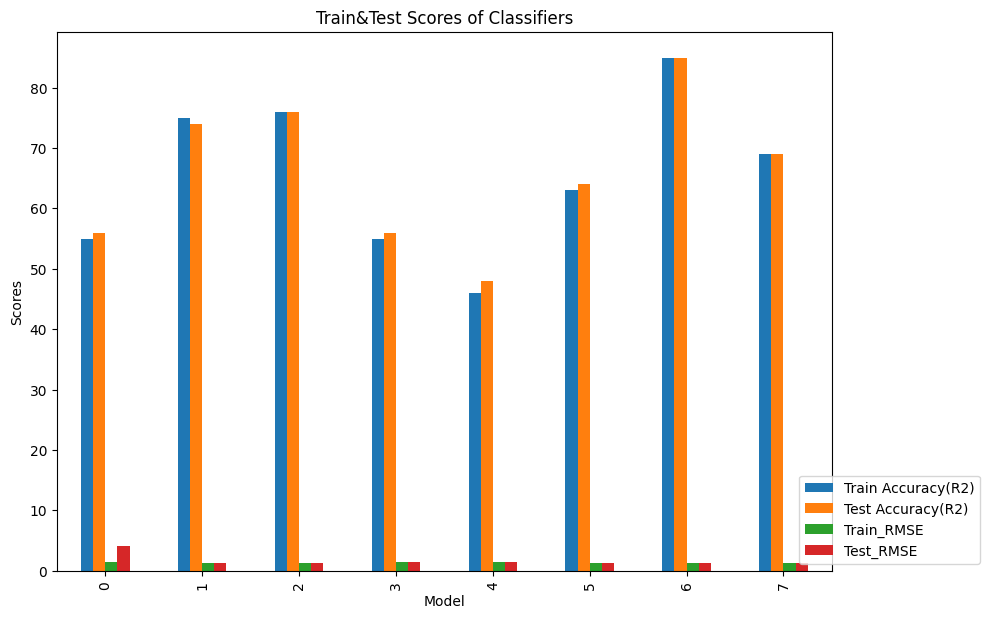

In [130]:
result.plot(kind="bar",figsize=(10,7))
plt.title('Train&Test Scores of Classifiers')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show()

# Conclusion:
Result: 7 types of Regression Algorithms applied in which Extreme Boost Regressor is most Accurate model amoung all.
Other model doesnot fit with this Dataset as all are underfit

# Import Pickle Moel

In [131]:
import pickle

pickle.dump(XGB, open(r'C:\Users\TRUPTI\Desktop\Trupti_AdvMLExam\build.pkl','wb'))  # Exporting model from python to laptop

# Prediction on Test/Live dataset

In [133]:
live_data = pd.read_excel(r"/FlightPrice/Flight_Price_Test.xlsx")
live_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [134]:
live_data1=live_data.copy()

# Data Preprocessing

In [135]:
print("Number of rows in Dataset :",live_data.shape[0])
print("Number of columns in Dataset :",live_data.shape[1])

Number of rows in Dataset : 2671
Number of columns in Dataset : 10


In [136]:
# Find Null Values
print("Number of Null Values in Dataset:")
live_data.isnull().sum()

Number of Null Values in Dataset:


,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [137]:
live_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [138]:
live_data['Date_of_Journey']=pd.to_datetime(live_data['Date_of_Journey'],format="%d/%m/%Y")


In [139]:
# Extract Date,Month,Year from Date_of_journey

live_data['Date']=live_data['Date_of_Journey'].dt.day
live_data['Month']=live_data['Date_of_Journey'].dt.month
live_data['Year']=live_data['Date_of_Journey'].dt.year
live_data['Duration']=pd.to_timedelta(live_data['Duration'])
live_data['Duration_hour']=live_data['Duration']/pd.Timedelta(hours=1)
live_data['Arrival_Hour']=pd.to_datetime(live_data['Arrival_Time']).dt.hour
live_data['Arrival_Minute']=pd.to_datetime(live_data['Arrival_Time']).dt.minute
live_data['Dep_Hour']=pd.to_datetime(live_data['Dep_Time']).dt.hour
live_data['Dep_Minute']=pd.to_datetime(live_data['Dep_Time']).dt.minute


In [140]:
live_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Duration_hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,0 days 10:55:00,1 stop,No info,6,6,2019,10.916667,4,25,17,30
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,0 days 04:00:00,1 stop,No info,12,5,2019,4.000000,10,20,6,20


In [141]:
live_data=live_data.drop(['Date_of_Journey','Arrival_Time','Dep_Time','Duration'],axis=1)
live_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Year,Duration_hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,10.916667,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,2019,4.000000,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,2019,23.750000,19,0,19,15


In [142]:
print("Number of rows in Dataset :",live_data.shape[0])
print("Number of columns in Dataset :",live_data.shape[1])

Number of rows in Dataset : 2671
Number of columns in Dataset : 14


# Perform Encoding

In [143]:
Numeric=live_data.select_dtypes(include=[np.number])
Numeric.head(3)

,Date,Month,Year,Duration_hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,6,6,2019,10.916667,4,25,17,30
1,12,5,2019,4.000000,10,20,6,20
2,21,5,2019,23.750000,19,0,19,15


In [144]:
Qualitative=live_data.select_dtypes(include=[object])
Qualitative.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included


In [145]:
# Apply Lable Encoder
from sklearn.preprocessing import LabelEncoder
Qualitative=Qualitative.apply(LabelEncoder().fit_transform)
Qualitative.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,4,2,1,76,0,5
1,3,3,0,65,0,5
2,4,2,1,76,0,3


In [146]:
# Merge Numeric and Qualitative data
final_data=pd.concat((Qualitative,Numeric),axis=1)
final_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Year,Duration_hour,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,4,2,1,76,0,5,6,6,2019,10.916667,4,25,17,30
1,3,3,0,65,0,5,12,5,2019,4.000000,10,20,6,20
2,4,2,1,76,0,3,21,5,2019,23.750000,19,0,19,15


# Apply Standard Scaler

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final_data)
final_data= scaler.transform(final_data)


# Used Extreme Boost model for prediction

In [148]:
XGBlivedata= np.round(XGB.predict(final_data),2) # Model used in traintest data

In [149]:
live_data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [150]:
live_data1['Predicted_value'] = np.round(XGB.predict(final_data),2)
#live_data['Residual'] = np.round(live_data.Price - test.Predicted,2)
live_data1['Predicted_price']=np.exp(live_data1.Predicted_value)
live_data1.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Predicted_value,Predicted_price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,9.50,13359.726562
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,8.54,5115.344727
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,9.20,9897.126953


In [151]:
live_data1.loc[:,['Airline','Source','Destination','Total_Stops','Predicted_price']]

,Airline,Source,Destination,Total_Stops,Predicted_price
0,Jet Airways,Delhi,Cochin,1 stop,13359.726562
1,IndiGo,Kolkata,Banglore,1 stop,5115.344727
2,Jet Airways,Delhi,Cochin,1 stop,9897.126953
3,Multiple carriers,Delhi,Cochin,1 stop,9136.200195
4,Air Asia,Banglore,Delhi,non-stop,4315.635742
...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,7115.280273
2667,IndiGo,Kolkata,Banglore,non-stop,4272.693359
2668,Jet Airways,Delhi,Cochin,1 stop,14617.871094
2669,Air India,Delhi,Cochin,1 stop,10097.067383


# Conclusion :

* Model Predicted data have 85% Accuracy
* Prediction can vary +-1.222

<Axes: xlabel='Predicted_price', ylabel='Airline'>

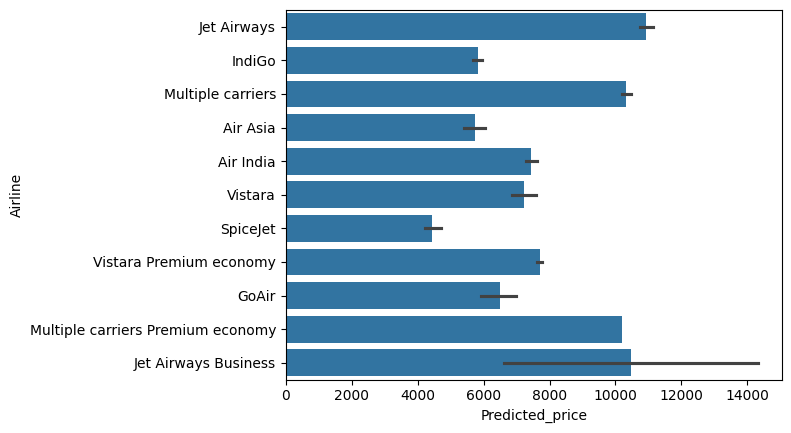

In [152]:
sns.barplot(x=live_data1['Predicted_price'],y=live_data1['Airline'])